<a href="https://colab.research.google.com/github/samriddhi448/TheSparksFoundation/blob/main/task_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Author: Samriddhi Jain
###GRIP: The Sparks Foundation
###Role: Data Science & Business Analytics Intern
###Duration: July 2021 - August 2021
###TASK 6: Decision Tree classifier



## importing Necessary library 

In [ ]:
import pandas as pd 
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import  train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn import tree


## reading the data

In [ ]:
url = 'https://raw.githubusercontent.com/Eternal422/Prediction-using-Decision-Tree/main/Iris.csv'
data = pd.read_csv(url)

In [ ]:
data.head(6)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa


## droping Unnecessary  columns

In [ ]:
data = data.drop(['Id'], axis=1) 
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
data.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [ ]:
data.Species.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [ ]:
data.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

## visualisaton

In [ ]:
iris = data.iloc[:,-1]
iris

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object

## pairPlot

<Figure size 1152x576 with 0 Axes>

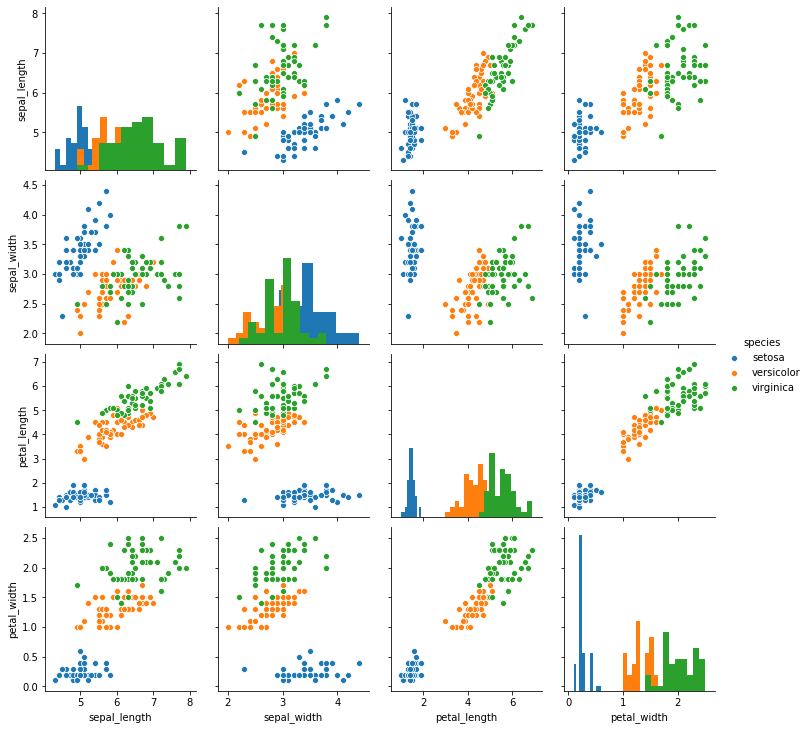

In [ ]:
plt.figure(figsize=(16,8))
iris = sns.load_dataset("iris")
sns.pairplot(iris, hue="species", diag_kind="hist")

## Corelation Matrix

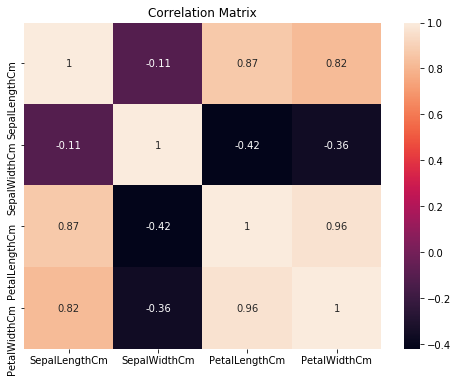

In [ ]:
plt.figure(figsize=(8,6))
plt.title("Correlation Matrix")
sns.heatmap(data.corr(), annot=True)

## Train - Test split

In [ ]:
x=iris.iloc[:,:-1] 
y=iris.iloc[:,4]

from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(x,y,test_size=0.3,random_state=0)


## Training the model

In [ ]:
from sklearn.tree import DecisionTreeClassifier as dtc, plot_tree
DTmodel = dtc(random_state=0) # construction of the Decision Tree model
model=DTmodel.fit(xTrain,yTrain) # training the model
model.classes_

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [ ]:

cNames=iris.species.unique()# class names 
print(cNames)
fNames=x.columns # feature names
print(fNames)

['setosa' 'versicolor' 'virginica']
Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')


## Plotting the Decision-Tree

The decision tree is as follows:


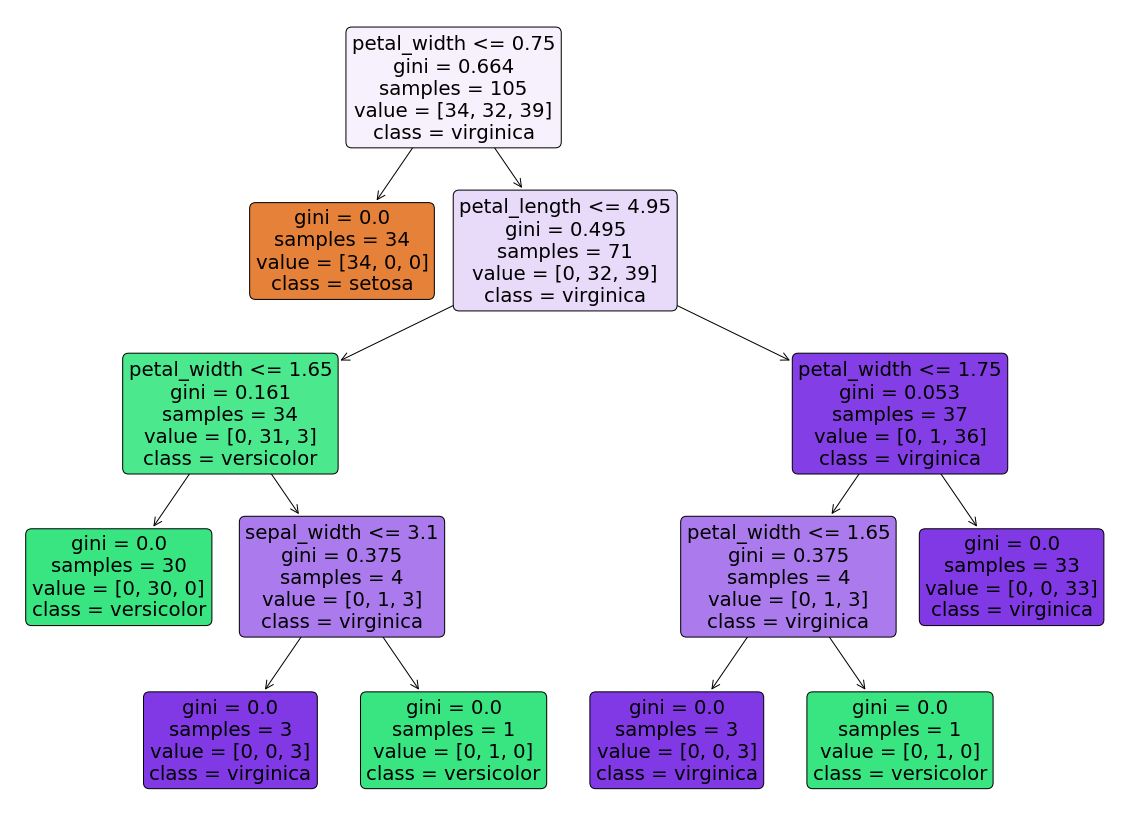

In [ ]:
plt.figure(figsize=(20,15))
plot_tree(model, feature_names=fNames, class_names=cNames, filled=True,rounded=True)
print("The decision tree is as follows:")

## Testing and Evaluation

In [ ]:
predicted=model.predict(xTest)  
compare=pd.DataFrame({'Predcited_class':predicted,'Actual_class':yTest})
compare.head(10)

,Predcited_class,Actual_class
114,virginica,virginica
62,versicolor,versicolor
33,setosa,setosa
107,virginica,virginica
7,setosa,setosa
100,virginica,virginica
40,setosa,setosa
86,versicolor,versicolor
76,versicolor,versicolor
71,versicolor,versicolor


In [ ]:
from sklearn import metrics
print('Accuracy = ',"{:.4f}".format(metrics.accuracy_score(predicted, yTest))) 
#calculating accuracy of model

Accuracy =  0.9778


In [ ]:
print(classification_report(yTest, predicted))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        16
  versicolor       1.00      0.94      0.97        18
   virginica       0.92      1.00      0.96        11

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



## Confusion Matrix

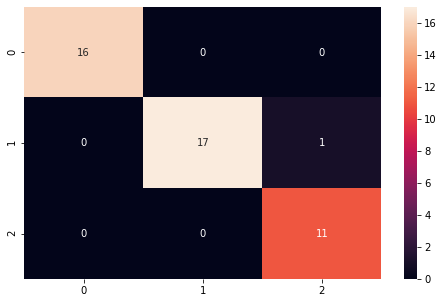

In [ ]:
conf_mat = confusion_matrix(yTest,  predicted)
plt.figure(figsize=(8,5))
sns.heatmap(conf_mat, annot=True)

## Adding new data to Classify

The decision tree is as follows:


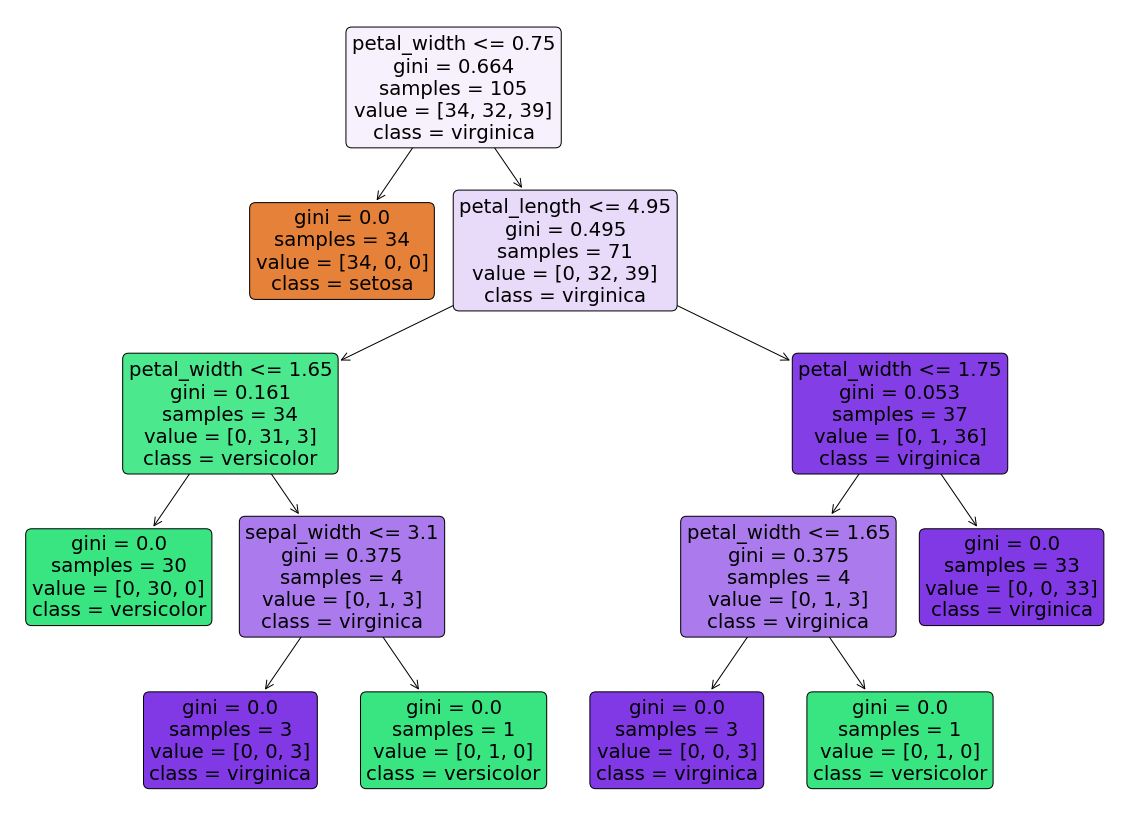

In [ ]:
plt.figure(figsize=(20,15))
plot_tree(model, feature_names=fNames, class_names=cNames, filled=True,rounded=True)
print("The decision tree is as follows:")

In [ ]:
sl=7.2
sw=3.2
pl=6.5
pw=2.2
new_info = [[sl,sw,pl,pw]]
result=model.predict(new_info)
print(result)

['virginica']


## Conclusion
### the Decision tree Has the accuracy 0f 97.7 
### the decision is able to predict the the class of new data accurately